<a href="https://colab.research.google.com/github/LokeshV790/ML_Based_Male_Fertility_Prediction/blob/main/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download Dataset**

In [ ]:
# Install aria2
!apt-get install -y aria2

# Create a directory to store the dataset
!mkdir -p /content/data

# Download the dataset using aria2 for faster download speeds
!aria2c -x 16 -s 16 -d /content/data -o visem.zip https://datasets.simula.no/downloads/visem.zip

# Unzip the dataset
!unzip /content/data/visem.zip -d /content/data/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 2s (699 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 123599 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu

# Setup and Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import cv2
import os


# Load and Explore Datasets

In [ ]:
# Define the paths to your datasets
participant_data_path = '/content/data/visem-dataset/participant_related_data.csv'
fatty_acids_spermatoza_path = '/content/data/visem-dataset/fatty_acids_spermatoza.csv'
fatty_acids_serum_path = '/content/data/visem-dataset/fatty_acids_serum.csv'
sex_hormones_path = '/content/data/visem-dataset/sex_hormones.csv'
semen_analysis_data_path = '/content/data/visem-dataset/semen_analysis_data.csv'
videos_metadata_path = '/content/data/visem-dataset/videos.csv'

# Load datasets into DataFrames
participant_data = pd.read_csv(participant_data_path)
fatty_acids_spermatoza = pd.read_csv(fatty_acids_spermatoza_path)
fatty_acids_serum = pd.read_csv(fatty_acids_serum_path)
sex_hormones = pd.read_csv(sex_hormones_path)
semen_analysis_data = pd.read_csv(semen_analysis_data_path)
videos_metadata = pd.read_csv(videos_metadata_path)

# Display the first few rows of each dataset
print("Participant Data:")
print(participant_data.head())

print("\nFatty Acids in Spermatozoa:")
print(fatty_acids_spermatoza.head())

print("\nFatty Acids in Serum:")
print(fatty_acids_serum.head())

print("\nSex Hormones Data:")
print(sex_hormones.head())

print("\nSemen Analysis Data:")
print(semen_analysis_data.head())

print("\nVideos Metadata:")
print(videos_metadata.head())


Participant Data:
         ID;Abstinence time(days);Body mass index (kg/m²);Age (years)
1;4 0;32                                               5;36          
2;4 0;33                                               7;61          
3;2 0;62                                               7;51          
4;2 5;45                                               5;38          
5;3 0;51                                               0;33          

Fatty Acids in Spermatozoa:
                                                                    ID;Sperm C14:0 (myristic acid);Sperm C15:0 (pentadecanoic acid);Sperm C16:0 (palmitic acid);Sperm C16:1 n-7 (palmitoleic acid);Sperm C17:0;Sperm C18:0 (stearic acid);Sperm C18:1 trans n-6 to n-11;Sperm C18:1 n-9 (oleic acid);Sperm C18:1 n-7 to n-11;Sperm C18:2 n-6 (Linoleic acid  \
1;1 3;0 2;24 3;0 9;0 3;9 7;0 8;9  8;2 4;4 2;0 9;0 02;0 05;0 4;0 5;0                                                1;4                                                                

In [ ]:
import pandas as pd

# Define the correct delimiter
delimiter = ';'

# Load datasets with the correct delimiter
participant_data = pd.read_csv('/content/data/visem-dataset/participant_related_data.csv', delimiter=delimiter)
fatty_acids_spermatoza = pd.read_csv('/content/data/visem-dataset/fatty_acids_spermatoza.csv', delimiter=delimiter)
fatty_acids_serum = pd.read_csv('/content/data/visem-dataset/fatty_acids_serum.csv', delimiter=delimiter)
sex_hormones = pd.read_csv('/content/data/visem-dataset/sex_hormones.csv', delimiter=delimiter)
semen_analysis_data = pd.read_csv('/content/data/visem-dataset/semen_analysis_data.csv', delimiter=delimiter)
videos_metadata = pd.read_csv('/content/data/visem-dataset/videos.csv', delimiter=delimiter)

# Display the first few rows of each dataset to confirm correct loading
print("Participant Data:")
print(participant_data.head())

print("\nFatty Acids in Spermatozoa:")
print(fatty_acids_spermatoza.head())

print("\nFatty Acids in Serum:")
print(fatty_acids_serum.head())

print("\nSex Hormones Data:")
print(sex_hormones.head())

print("\nSemen Analysis Data:")
print(semen_analysis_data.head())

print("\nVideos Metadata:")
print(videos_metadata.head())


Participant Data:
   ID Abstinence time(days) Body mass index (kg/m²)  Age (years)
0   1                   4,0                    32,5           36
1   2                   4,0                    33,7           61
2   3                   2,0                    62,7           51
3   4                   2,5                    45,5           38
4   5                   3,0                    51,0           33

Fatty Acids in Spermatozoa:
   ID Sperm C14:0 (myristic acid) Sperm C15:0 (pentadecanoic acid)  \
0   1                         1,3                              0,2   
1   2                         1,5                              0,2   
2   3                         1,1                              0,2   
3   4                         1,1                              0,2   
4   5                         1,1                              0,1   

  Sperm C16:0 (palmitic acid) Sperm C16:1 n-7 (palmitoleic acid) Sperm C17:0  \
0                        24,3                                0

# Participant Data
This dataset includes information about participants, such as:

ID: Unique identifier for each participant.
Abstinence time (days): Duration of abstinence before semen collection.
Body mass index (BMI): Participant's BMI.
Age (years): Participant's age.


# Fatty Acids in Spermatozoa
This dataset contains data on various fatty acids present in sperm cells, such as:

ID: Unique identifier for each sample.
Sperm C14:0 (myristic acid), Sperm C16:0 (palmitic acid), etc.: Concentrations of specific fatty acids in spermatozoa.


# Fatty Acids in Serum
This dataset includes fatty acid profiles in blood serum, including:

ID: Unique identifier for each participant.
Serum C14:0 (myristic acid), Serum C16:0 (palmitic acid), etc.: Concentrations of specific fatty acids in the serum.


# Sex Hormones Data
This dataset contains hormone levels related to fertility, such as:

ID: Unique identifier for each participant.
Serum total testosterone (nmol/L), Serum oestradiol (nmol/L), etc.: Levels of various hormones in the serum.


# Semen Analysis Data
This dataset includes comprehensive semen analysis results, such as:

ID: Unique identifier for each sample.
Sperm concentration (x10⁶/mL), Total sperm count (x10⁶), Progressive motility (%), etc.: Various metrics related to sperm quality.


# Videos Metadata
This dataset lists the metadata for sperm motility videos:

ID: Unique identifier for each video.
video: Filename of the sperm video.

# **Data Preprocessing**

In [ ]:
import numpy as np

def clean_and_fill_data(df):
    # Replace non-numeric values with NaN
    df.replace('Not reported', np.nan, inplace=True)

    # Convert columns to numeric, replacing commas with dots
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.')
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

    # Fill missing values with the mean
    df.fillna(df.mean(), inplace=True)

    return df

# Clean the datasets
participant_data = clean_and_fill_data(participant_data)
fatty_acids_spermatoza = clean_and_fill_data(fatty_acids_spermatoza)
fatty_acids_serum = clean_and_fill_data(fatty_acids_serum)
sex_hormones = clean_and_fill_data(sex_hormones)
semen_analysis_data = clean_and_fill_data(semen_analysis_data)

# Verify that the columns are numeric and missing values have been handled
print(participant_data.info())
print(fatty_acids_spermatoza.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       85 non-null     int64  
 1   Abstinence time(days)    85 non-null     float64
 2   Body mass index (kg/m²)  85 non-null     float64
 3   Age (years)              85 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 2.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            85 non-null     int64  
 1   Sperm C14:0 (myristic acid)                   85 non-null     float64
 2   Sperm C15:0 (pentadecanoic acid)              85 non-null     float64
 3   Sperm C16:0 (palmitic acid)         

In [ ]:
# Handle missing values by filling with the mean (or any other appropriate method)
participant_data.fillna(participant_data.mean(), inplace=True)
fatty_acids_spermatoza.fillna(fatty_acids_spermatoza.mean(), inplace=True)
fatty_acids_serum.fillna(fatty_acids_serum.mean(), inplace=True)
sex_hormones.fillna(sex_hormones.mean(), inplace=True)
semen_analysis_data.fillna(semen_analysis_data.mean(), inplace=True)

# Verify that the columns are numeric and missing values have been handled
print(participant_data.info())
print(fatty_acids_spermatoza.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       85 non-null     int64  
 1   Abstinence time(days)    85 non-null     float64
 2   Body mass index (kg/m²)  85 non-null     float64
 3   Age (years)              85 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 2.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            85 non-null     int64  
 1   Sperm C14:0 (myristic acid)                   85 non-null     float64
 2   Sperm C15:0 (pentadecanoic acid)              85 non-null     float64
 3   Sperm C16:0 (palmitic acid)         

# **Exploratory Data Analysis (EDA)**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numeric features to be scaled
numeric_features = participant_data.select_dtypes(include=[np.number])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric data
participant_data_scaled = scaler.fit_transform(numeric_features)

# Convert the scaled features back to a DataFrame
participant_data_scaled = pd.DataFrame(participant_data_scaled, columns=numeric_features.columns)


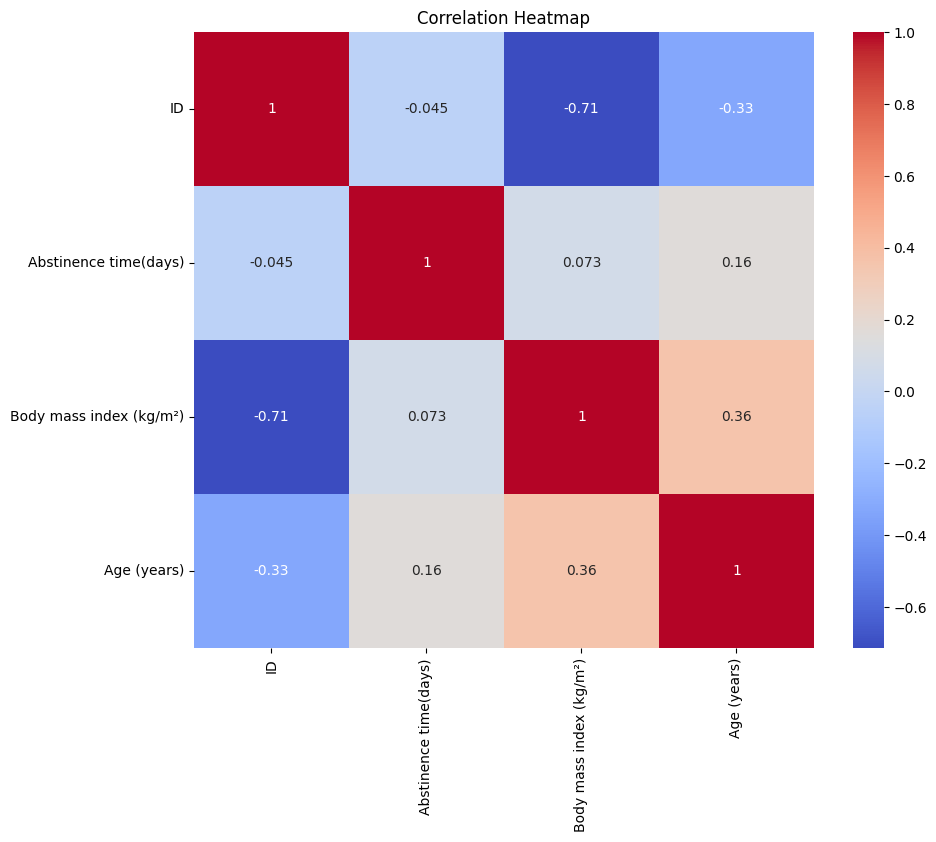

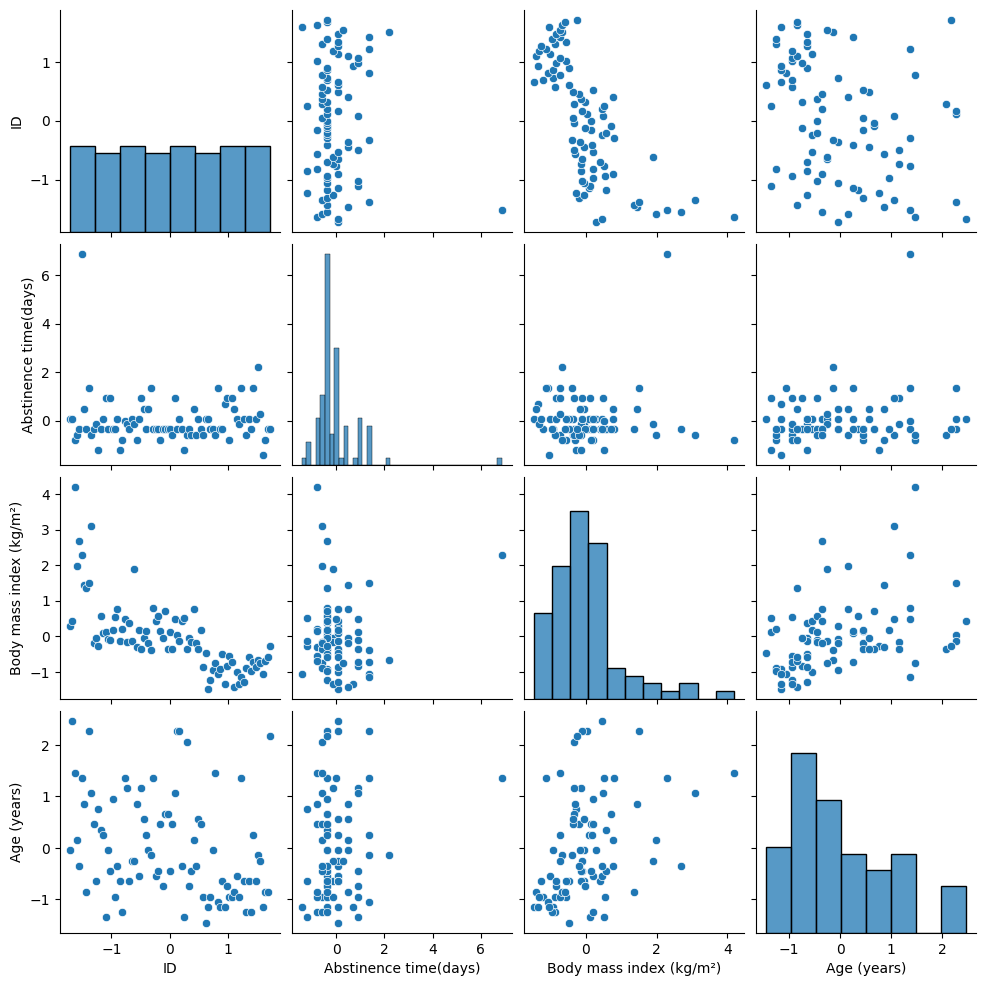

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Example: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(participant_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example: Pairplot
sns.pairplot(participant_data_scaled)
plt.show()


# **Model Building**

In [ ]:
import pandas as pd
import numpy as np

# Convert comma-separated strings to floats
def convert_to_float(df):
    return df.replace(',', '.', regex=True).apply(pd.to_numeric, errors='ignore')

# Apply conversion
participant_data = convert_to_float(participant_data)
fatty_acids_spermatoza = convert_to_float(fatty_acids_spermatoza)
fatty_acids_serum = convert_to_float(fatty_acids_serum)
sex_hormones = convert_to_float(sex_hormones)
semen_analysis_data = convert_to_float(semen_analysis_data)

# Merge datasets on 'ID'
combined_data = participant_data.merge(fatty_acids_spermatoza, on='ID').merge(fatty_acids_serum, on='ID').merge(sex_hormones, on='ID').merge(semen_analysis_data, on='ID')


# **Video Feature Extraction**

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
from multiprocessing import Pool, cpu_count, set_start_method
from tqdm import tqdm  # For ETA

# Set multiprocessing to use 'spawn' to avoid issues with JAX or other multithreaded libraries
try:
    set_start_method('spawn')
except RuntimeError:
    pass  # If the method is already set, ignore the error

# Define the directory containing the videos
video_dir = '/content/data/visem-dataset/videos/'

# Function to extract features from a single video
def extract_features_from_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)
    features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        features.append(np.mean(gray))  # Example feature: mean pixel value

    cap.release()

    if features:
        return {
            'ID': int(video_file.split('_')[0]),
            'Video Mean Feature': np.mean(features),
            'Video Std Feature': np.std(features)
        }
    return None

# Function to process videos in parallel with ETA
def process_videos_in_parallel(video_files, chunk_size=5):
    video_chunks = [video_files[i:i + chunk_size] for i in range(0, len(video_files), chunk_size)]
    all_features = []

    # Loop through video chunks with progress bar
    for chunk in tqdm(video_chunks, desc="Processing videos", unit="chunk"):
        with Pool(processes=cpu_count()) as pool:
            video_features = pool.map(extract_features_from_video, chunk)
        all_features.extend([vf for vf in video_features if vf is not None])

    return all_features

# Get the list of video files
video_files = [f for f in os.listdir(video_dir) if f.endswith('.avi')]

# Process videos in parallel with ETA
video_features_list = process_videos_in_parallel(video_files)

# Convert the list of features into a DataFrame
video_features_df = pd.DataFrame(video_features_list)

# Display the first few rows to confirm
print(video_features_df.head())


In [ ]:
# # Merge video features with the combined data
# combined_data_with_videos = combined_data.merge(video_features_df, on='ID')

combined_data_with_videos = pd.read_csv('/content/data/combined_data_with_videos.csv')
# Display the first few rows to confirm the merge
print(combined_data_with_videos.head())


   ID  Abstinence time(days)  Body mass index (kg/m²)  Age (years)  \
0   1                    4.0                     32.5           36   
1   2                    4.0                     33.7           61   
2   3                    2.0                     62.7           51   
3   4                    2.5                     45.5           38   
4   5                    3.0                     51.0           33   

   Sperm C14:0 (myristic acid)  Sperm C15:0 (pentadecanoic acid)  \
0                          1.3                               0.2   
1                          1.5                               0.2   
2                          1.1                               0.2   
3                          1.1                               0.2   
4                          1.1                               0.1   

   Sperm C16:0 (palmitic acid)  Sperm C16:1 n-7 (palmitoleic acid)  \
0                         24.3                                 0.9   
1                         26.3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Load the combined dataset
combined_data_with_videos = pd.read_csv('/content/data/combined_data_with_videos.csv')

# Step 2: Handle missing values (as discussed previously)
def clean_and_fill_data(df):
    df.replace('Not reported', pd.NA, inplace=True)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.')
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.fillna(df.mean(), inplace=True)
    return df

combined_data_with_videos = clean_and_fill_data(combined_data_with_videos)

# Step 3: Define features (X) and target (y)
target_column = 'Sperm concentration (x10⁶/mL)'  # Replace with your target column
X = combined_data_with_videos.drop(target_column, axis=1)
y = combined_data_with_videos[target_column]

# Step 4: Split the data (optional, for initial validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Squared Error: {mse}")
print(f"Random Forest - R-squared: {r2}")

# Step 7: Train on the entire dataset
model.fit(X, y)

# Step 8: Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')

print("Model saved as 'random_forest_model.pkl'")


Random Forest - Mean Squared Error: 610.791062294118
Random Forest - R-squared: 0.745016196187624
Model saved as 'random_forest_model.pkl'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Step 1: Load the dataset
df = pd.read_csv('/content/data/combined_data_with_videos.csv')

# Step 2: Preprocess data (handling missing values, data cleaning)
def clean_and_fill_data(df):
    df.replace('Not reported', pd.NA, inplace=True)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.')
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.fillna(df.mean(), inplace=True)
    return df

df = clean_and_fill_data(df)

# Step 3: Define features (X) and target (y)
# Inputs from the user and video features
features = ['Abstinence time(days)', 'Body mass index (kg/m²)', 'Age (years)',
            'Normal spermatozoa (%)', 'Teratozoospermia index', 'Total sperm count (x10⁶)',
            'Sperm vitality (%)', 'Progressive motility (%)', 'Sperm concentration (x10⁶/mL)',
            'Head defects (%)', 'Tail defects (%)', 'Video Mean Feature', 'Video Std Feature']

# Choose a target to classify as 'Fertile' or 'Not Fertile'
df['Fertile'] = df['Progressive motility (%)'] > 32  # Assuming fertility threshold at 32%
X = df[features]
y = df['Fertile']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Train on the entire dataset
model.fit(X, y)

# Step 8: Save the model to a file
joblib.dump(model, 'gradient_boosting_classifier.pkl')
print("Model saved as 'models/gradient_boosting_classifier.pkl'")


Accuracy: 1.0
[[ 5  0]
 [ 0 12]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         5
        True       1.00      1.00      1.00        12

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Model saved as 'models/gradient_boosting_classifier.pkl'


In [ ]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick


In [ ]:
!pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Load the combined dataset
combined_data_with_videos = pd.read_csv('/content/data/combined_data_with_videos.csv')

# Step 2: Handle missing values (as discussed previously)
def clean_and_fill_data(df):
    df.replace('Not reported', pd.NA, inplace=True)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.')
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.fillna(df.mean(), inplace=True)
    return df

combined_data_with_videos = clean_and_fill_data(combined_data_with_videos)

# Step 3: Define features (X) and target (y)
target_column = 'Sperm concentration (x10⁶/mL)'  # Replace with your target column
X = combined_data_with_videos.drop(target_column, axis=1)
y = combined_data_with_videos[target_column]

# Step 4: Split the data (optional, for initial validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - Mean Squared Error: {mse}")
print(f"Gradient Boosting - R-squared: {r2}")

# Step 7: Train on the entire dataset
model.fit(X, y)

# Step 8: Save the model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')

print("Model saved as 'gradient_boosting_model.pkl'")


Gradient Boosting - Mean Squared Error: 645.6705835040317
Gradient Boosting - R-squared: 0.7304552218343753
Model saved as 'gradient_boosting_model.pkl'


In [ ]:
X

,ID,Abstinence time(days),Body mass index (kg/m²),Age (years),Sperm C14:0 (myristic acid),Sperm C15:0 (pentadecanoic acid),Sperm C16:0 (palmitic acid),Sperm C16:1 n-7 (palmitoleic acid),Sperm C17:0,Sperm C18:0 (stearic acid),...,Midpiece and neck defects (%),Tail defects (%),Cytoplasmic droplet (%),Teratozoospermia index,Non progressive sperm motility (%),Immotile sperm (%),"High DNA stainability, HDS (%)","DNA fragmentation index, DFI (%)",Video Mean Feature,Video Std Feature
0,1,4.0,32.5,36,1.3,0.2,24.3,0.9,0.3,9.7,...,11.2,38.0,3.4,1.54,19,30,13,29,89.219381,5.560114
1,2,4.0,33.7,61,1.5,0.2,26.3,1.3,0.3,8.9,...,8.5,24.5,2.0,1.36,16,62,13,57,120.154268,1.090677
2,3,2.0,62.7,51,1.1,0.2,24.8,0.9,0.2,9.0,...,32.8,14.3,1.5,1.51,26,56,11,12,103.208766,0.713451
3,4,2.5,45.5,38,1.1,0.2,22.8,1.0,0.3,9.4,...,24.1,23.1,5.2,1.53,26,41,10,15,98.748822,1.740456
4,5,3.0,51.0,33,1.1,0.1,22.1,0.9,0.2,9.7,...,32.5,15.7,7.0,1.56,22,35,21,13,107.800820,1.527464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,4.5,24.5,34,1.0,0.2,24.9,0.9,0.3,10.6,...,13.4,8.0,1.5,1.19,27,12,8,14,105.277398,13.089023
81,82,0.5,22.1,25,1.0,0.1,21.7,0.9,0.3,12.3,...,30.5,14.0,15.5,1.60,33,50,13,8,90.071199,0.946569
82,83,2.0,24.9,28,0.9,0.1,25.2,0.8,0.3,9.4,...,25.2,8.6,5.2,1.42,20,15,8,16,127.748072,2.805577
83,84,3.0,25.7,28,1.0,0.2,23.2,0.8,0.2,8.8,...,28.7,7.2,0.8,1.36,31,34,5,15,109.430955,2.446403


In [ ]:
pd.read_csv('/content/data/visem-dataset/videos.csv')

,ID;video
0,1;1_09.09.02_SSW.avi
1,2;2_09.09.03_lots of debris_SSW.avi
2,3;3_11.01.21_JMA.avi
3,4;4_11.03.29_HH.avi
4,5;5_11.05.04_JMA.avi
...,...
80,81;81_11.05.26_HH.avi
81,82;82_11.06.23_JMA.avi
82,83;83_11.11.09_HH.avi
83,84;84_11.12.21_HH.avi


In [ ]:
pd.read_csv('/content/data/visem-dataset/participant_related_data.csv')

,,ID;Abstinence time(days);Body mass index (kg/m²);Age (years)
1;4,0;32,5;36
2;4,0;33,7;61
3;2,0;62,7;51
4;2,5;45,5;38
5;3,0;51,0;33
...,...,...
81;4,5;24,5;34
82;0,5;22,1;25
83;2,0;24,9;28
84;3,0;25,7;28
